##Integración por Monte Carlo

Queremos calcular la integral de $f(\mathbf{x})$ en un dominio de $\Re^d$ ($d$ dimensiones) de volumen $V=\int_D d^d\mathbf{x} $. Tiramos $N$ puntos $\mathbf{x}_i$ distribuidos de manera uniforme adentro del dominio y calculamos el valor promedio de $f$:
$$
\langle f\rangle =\frac{1}{N}\sum_{i=1}^N f(\mathbf{x}_i)
$$
Estimamos la integral de $f$ como:
$$
I =V \langle f\rangle
$$
El teorema del límite central establece que la suma de un gran número de variables independientes idénticamente distribuidas va a tener una distribución normal. Así que podemos estimar el error de la integral usando la desviación estándar de $f(\mathbf{x})$
$$
\varepsilon\sim V \frac{\sigma}{\sqrt{N}}
$$
donde
$$
\sigma =\sqrt{  \langle f^2\rangle- \langle f\rangle^2}.
$$
La dependencia del error $\varepsilon$ con $N$ es independiente de la dimensión $d$.

Esto contrasta con los métodos deterministas (trapecios, Simpson, etc.) que tienen un error $\mathcal{O}(h^\ell)$, donde $h$ es el paso de discretización y $\ell$ un número natural. Si calculamos la función en N puntos en $d$ dimensiones, la discretización $h\sim \frac{1}{N^{1/d}}$, por lo que el error va a decrecer como $\sim \frac{1}{N^{\ell/d}}$. Para $d$ suficientemente grande, el error decrece demasiado lento.



### Integramos la functión $f(x)=x^2$ entre 0 y 1

El resultado analítico es $1/3$. En el gráfico siguiente se muestra cómo se aproxima el área bajo la curva a partir de la suma del área de rectángulos de ancho $(b-a)/N$ y alto $f(x_i)$

$$
I\sim \sum_i^N\frac{b-a}{N}f(x_i)
$$
con los $x_i$ sacados de una distribución uniforme$(0,1)$.

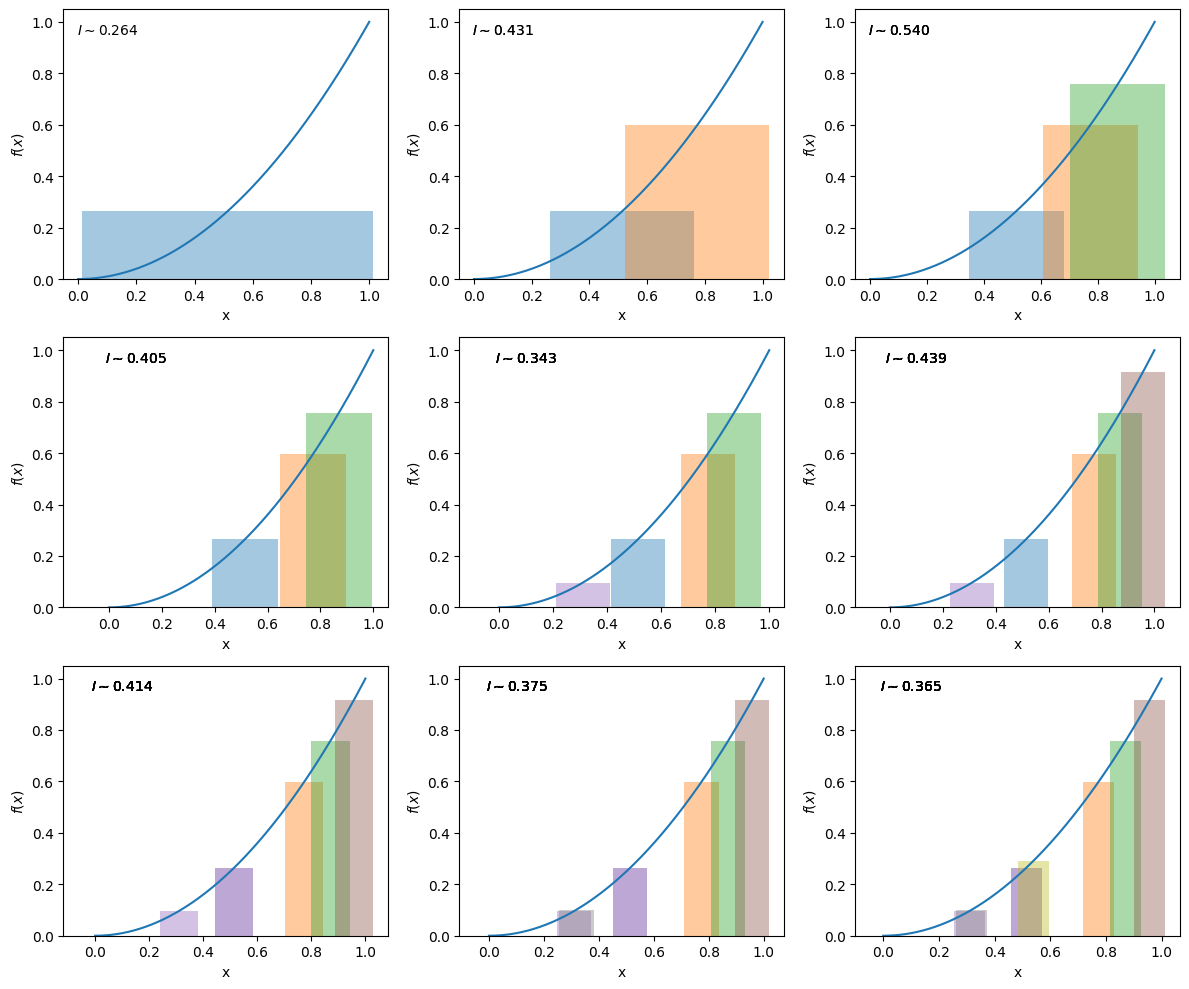

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función y el intervalo
f = lambda x: x**2
a, b = 0, 1

fig, axs = plt.subplots(3, 3, figsize=(12, 10))

for ax, n_puntos in zip(axs.flatten(), range(1,10)):
    x_vals = np.linspace(a, b, 500)
    y_vals = f(x_vals)

    ax.plot(x_vals, y_vals)

    # Generamos puntos x_i distribuidos de manera uniforme(a,b)
    np.random.seed(14) # Definimos la semilla del generador para ir agregando puntos
    x_random = np.random.uniform(a, b, n_puntos)

    # Evaluar la función en estos puntos
    y_random = f(x_random)

    #
    I = ((b - a) / n_puntos) * np.sum(y_random)

    # Rectángulos centrados en x_i
    for x, y in zip(x_random, y_random):
        ax.bar(x, y, width=(b-a)/n_puntos, alpha=0.4, align='center')

        ax.annotate(f'$I\\sim {I:.3f}$', (0.1, 0.9), textcoords="offset points", xytext=(0,10), ha='center')

    ax.set_xlabel('x')
    ax.set_ylabel('$f(x)$')
   # ax.grid(True)

plt.tight_layout()
plt.show()


## Integrando esferas
Vimos que podíamos obtener $\pi$ por medio del método de Montecarlo, tirando al azar puntos en un cuadrado.
Podemos pensar a ese proceso como realizar la integral de la función
$$
f(x,y)=\left\{\begin{matrix}1,\,\,\, si\,\, x^2+y^2 \leq 1\\ 0,\,\,\, si\,\, x^2+y^2 > 1\end{matrix}\right.
$$
el area del disco se obtiene multiplicando el area del cuadrado por la razón entre los puntos que caen adentro y el total de puntos tirados.

Supongamos que queremos calcular el volumen de una esfera de radio $1$ en $d$ dimesiones espaciales. Tiramos $N$ puntos dentro de un hipercubo de $d$ dimensiones ($d$ variables aleatorias $x_i$ uniformes en $[-1,1]$) y contamos los puntos que caen dentro de la esfera ($\sum_{i=1}^d x_i^2< 1$). El volumen de la esfera es entonces el volumen del hipercubo $V_{cub}=2^d$ multiplicado número de puntos que caen adentro de la esfera y dividido por el número total de puntos.

En este caso conocemos el resultado analíticamente. El volumen de la esfera es:
$$V_{esf}(d) = \frac{\pi^{d/2}}{\Gamma\bigl(\tfrac d2 + 1\bigr)}$$
por lo que el número de puntos que esperamos que caigan dentro de la esfera es:
$$N_{adentro}\sim N\frac{V_{esf}(d)}{V_{cub}} = N\frac{\pi^{d/2}}{2^d\Gamma\bigl(\tfrac d2 + 1\bigr)}$$
El problema que surge es que el volumen de la esfera para $d$ grande es muy chico.

No es fácil pensar en altas dimensiones. [Este video](https://www.youtube.com/watch?v=mceaM2_zQd8) lo ilustra muy bien.

In [ ]:
import numpy as np
import math

def Vesfera(d):
    return np.pi**(d/2.0)/math.gamma(d/2.0+1)
def Vcubo(d):
    return 2**d

dim = 150
print(f"Volumen de una esfera de radio 1 en {dim} dimensiones:", Vesfera(dim))
print(f"Volumen de un cubo de lado 2 en {dim} dimensiones:", Vcubo(dim))
print("Proporcion de puntos dentro de la esfera", Vesfera(dim)/Vcubo(dim))

Volumen de una esfera de radio 1 en 150 dimensiones: 7.791637300245978e-73
Volumen cubo de lado 2 en 150 dimensiones: 1427247692705959881058285969449495136382746624
Proporcion de puntos dentro de la esfera 5.459204691705327e-118


Claramante, el método de Montecarlo de muestreo directo (direct sampling) que estamos usando no funciona en este caso, como tampoco va a funcionar un método de integración tradicional.

Este es un problema general de las integrales en altas dimensiones como las que aparecen en física estadística y cuántica. Esas integrales suelen estar dominadas por un subconjunto de puntos en el dominio de integración. Esto es, en la mayoría del dominio de integración la función a integrar es cero como ocurre con la hiperesfera adentro del hipercubo.

La buena noticia es que en lugar de hacer un muestreo directo podemos hacer el muestreo de manera que aparezcan con mayor probabilidad los valores relevantes del integrando usando una cadena de Markov. Veamos primero cómo recorrer el dominio de acuerdo a una distribución de probabilidad dada.



# Método de metropolis

Consideremos nuevamente la grilla de $3\times3$ pero ahora supongamos que queremos que el disco visite las celdas con probabilidades diferentes, como se muestra en la figura.


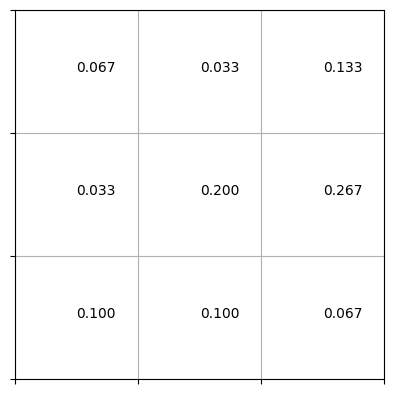

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# frecuencias esperadas
aux = [3, 3, 2, 1, 6, 8, 2, 1, 4]

# Normalizamos para obtener las probabilidades esperadas
probabilidades =  aux / np.sum(aux)

ax.set_xticks([0, 1, 2, 3])
ax.set_yticks([0, 1, 2, 3])
ax.grid(True)

for i in range(3):
    for j in range(3):
        prob = probabilidades[i + 3 *j]
        ax.text(i + 0.5, j + 0.5, f'{prob:.3f}')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()


Podemos usar el mismo algoritmo de cadena de Markov para recorrer los casilleros con esas probabilidades si elegimos las probabilidades de transición usando **balance detallado**. Como en el caso homogéneo, hay que satisfacer la condición de balance global que nos asegura que en el equilibrio (cuando la distribución de probabilidad es la buscada) el flujo entrante de probabilidad a un estado tiene que ser igual al saliente.

Nuevamente podemos lograr esto pidiendo la condición más estricta de **balance detallado**:
$$
p_i p_{i\to j} = p_j p_{j\to i}
$$
para todas las celdas $i$ y $j$.

El método de Metropolis (1953) consiste en elegir
$$
p_{i\to j}= \min\left(1,\frac{p_j}{p_i}\right).
$$
Vemos que si $p_j>p_i$ entonces
$$
p_{i\to j}= \min\left(1,\frac{p_j}{p_i}>1\right)=1
$$
y
$$
p_{j\to i}= p_{i\to j}= \min\left(1,\frac{p_i}{p_j}< 1\right)=p_i/p_j,
$$
por lo que se cumple la condición de balance detallado, como se puede ver remplazando estas probabilidades de transición en
$$
p_i p_{i\to j} = p_j p_{j\to i}.
$$

Al igual que para el caso de probabilidad uniforme, si proponemos una movida fuera del tablero, la rechazamos y el disco queda donde estaba. Esto es, rechazamos el cambio pero tenemos en cuenta el estado resultante (que es igual al estado previo).

La opción de Metropolis no es la única posible como tampoco lo es balance detallado. Según el problema puede ser más conveniente usar otros esquemas. Metropolis es de lejos la opción más usada en física porque es relativamente fácil de implementar y analizar.


En el siguiente código implementamos el método de Metropolis para la grilla usando las probabilidades definidas en la figura de arriba.

In [ ]:
import random

# Tamaño de la grilla
Ng = 3
Nceldas = Ng * Ng

# Dada una posición y un movimiento propuesto da la siguiente celda
def veccel(i, j, move):
    nx = i + move[0]
    ny = j + move[1]
    if( nx < 0 or nx  == Ng or  ny < 0 or ny == Ng):
        return i + Ng * j # si me voy a salir rechazo y me quedo
    return nx + Ng * ny # nueva celda

# Movidas posibles: derecha, arriba, izquierda, abajo
moves = [[1,0], [0,1], [-1,0], [0,-1]]

# Generamos una lista de vecinos considerando los casos de rechazo
vecinos = []
for j in range(Ng):
    for i in range(Ng):
        vec_c = []
        for k in range(len(moves)):
            vec_c.append(veccel(i,j, moves[k]))
        vecinos.append(vec_c)
#print(vecinos)

# Lista con Nceldas valores inicializados es 0
histo = [0 for _ in range(Nceldas)]

# Número de movimientos a proponer
num_pasos = 100000

# Posición inicial en la celda 8
pos = 8

# Acepta o rechaza movida usando metrópolis
for _ in range(num_pasos):
    pos_nueva = vecinos[pos][random.randint(0, 3)]
    # Si la probabilidad de la otra celda es mas alta o igual -> acepto
    if(probabilidades[pos_nueva] > probabilidades[pos]):
        pos = pos_nueva
    # Si la probabilidad de la otra celda es mas baja -> acepto con probabilidad p(final)/p(inicial)
    elif(probabilidades[pos_nueva]/probabilidades[pos] > np.random.uniform()):
        pos = pos_nueva
    # Sin importar si acepté o rechacé le agrego una visita a la celda actual.
    histo[pos] +=1

num_esp = probabilidades * num_pasos
for i in range(Nceldas):
    print(f"Celda {i} fue visitada {histo[i]} veces, se esperaba {num_esp[i]:.0f}")


Celda 0 fue visitada 9807 veces, se buscaba 10000
Celda 1 fue visitada 10100 veces, se buscaba 10000
Celda 2 fue visitada 6589 veces, se buscaba 6667
Celda 3 fue visitada 3408 veces, se buscaba 3333
Celda 4 fue visitada 20319 veces, se buscaba 20000
Celda 5 fue visitada 26705 veces, se buscaba 26667
Celda 6 fue visitada 6560 veces, se buscaba 6667
Celda 7 fue visitada 3350 veces, se buscaba 3333
Celda 8 fue visitada 13162 veces, se buscaba 13333


## Sistemas de física estadística
 Consideremos un sistema descripto por la energía (o el hamiltoniano) $E(X)$, donde $\{X\}$ es el conjunto de todos los grados de libertad. Supongamos que nos interesa un observable específico $O(X)$ y queremos calcular su valor medio $\langle O \rangle$ a una temperatura $T$. De la física estadística, sabemos que la probabilidad de encontrar al sistema en un estado $X$ puede obtenerse a partir de la función de partición:
$Z=\int e^{-\beta E(X)}dX$
donde $\beta=1/(k_BT)$ y se integra sobre todos los grados de libertad. La probabilidad de encontrar al sistema en un estado $X$ está dada por el factor de Boltzmann $e^{-\beta E(X)}/Z$. La expresión para el valor esperado entonces puede expresarse como:
$$\langle O\rangle = \frac{1}{Z}\int e^{-\beta E(X)} O(X) dX
$$
Para la mayoría de los casos de interés, $X$ es una colección de muchos parámetros. Por ejemplo, un sistema con $N$ átomos tendría $6N$ grados de libertad (posiciones y velocidades).

Si intentamos hacer esta integral por un método directo de integración o por muestreo directo de Montecarlo vamos a fracasar. Suponiendo que podamos definir un hipercubo que encierra los valores donde el integrando es distinto de cero, vamos a tener en general el mismo problema que con la esfera. El número de puntos en que el integrando es distinto de cero va a ser en general despreciable respecto al número total de puntos que tiramos adentro del hipercubo. ¡En altas dimensiones, casi todos los puntos caen cerca de la superficie del hipercubo!



## Muestreo por importancia



El algoritmo de Metropolis (Nicholas Metropolis et al. 1953) es particularmente eficiente para obtener muestras en sistemas de muchas dimensiones en equilibrio termodinámico.  

En cada paso de Monte Carlo se propone un cambio en el estado del sistema.  Este nuevo estado se acepta o se rechaza con cierta probabilidad siguiendo un criterio específico que suele estar basado en el principio de balance detallado.
Si el nuevo estado es aceptado, el sistema evoluciona hacia ese estado; de lo contrario, el sistema permanece en su estado actual. A lo largo de numerosos pasos, la evolución del sistema lleva a que los estados a los que se va accediendo aparezcan con la distribución de probabilidad deseada, lo que nos permite calcular propiedades del sistema.

La probabilidad de que un sistema en equilibrio térmico esté en un estado $i$ esta dada por la distribución de Boltzmann $ p_i=e^{-\beta E_i}/Z$, donde $E_i$ es la energía del estado $i$ y $Z$ la función de partición. La probabilidad de transición del estado $i$ al estado $f$ prescripta por el algoritmo de Metropolis es:
$$
p_{i\to f}=\min\left(1,  \frac{p_f}{p_i}\right)=\min\left(1,  \frac{e^{-\beta E_f}}{e^{-\beta E_i}}\right)
$$
Definiendo el cambio de energía $\Delta E= E_i-E_f$ nos queda:
$$
p_{i\to f}=\min\left(1, e^{-\beta \Delta E}\right)
$$

## Cadena de Markov

Cuando calculamos $\pi$ recorriendo el cuadrado proponiendo pasos al azar vimos un ejemplo de una secuencia de estados del sistema (posiciones en el cuadrado) que se conoce como cadena de Markov.

De manera más general, consideremos una secuencia de estados aleatorios ${X_1, X_2, X_3,\ldots}$ que forman una cadena de Markov. La probabilidad de pasar del estado actual a otro $p_{X\to X^\prime}$ (probabilidad de transición) depende del estado actual $X$ y no de la historia de cómo llegamos a él. En ese sentido se dice que la cadena de Markov no tiene memoria.

Las probabilidades de transición tienen que satisfacer la regla de suma:
$$
\sum_{X^\prime} p_{X\to X^\prime}=1
$$
donde la suma incluye el caso $X^\prime=X$ (probabilidad de quedarse en el mismo estado).

La probabilidad $p_X^{t+1}$ de obtener el estado $X$ a tiempo $t+1$ está dada por:
$$
p_X^{t+1} = p_X^{t} - \sum_{X^\prime} p_X^{t} p_{X\to X^\prime}+\sum_{X^\prime} p_{X^\prime}^{t} p_{X^\prime\to X}
$$
(los términos con $X=X^\prime$ de las dos sumas se cancelan).

Lo que buscamos es que el sistema llegue a una distribución de probabilidad de equilibrio $p_X$. Esto es, para $t\to \infty$
$$
p_X^{t}\to p_X
$$
por lo que a tiempos largos:
$$
p_X^{t+1}\simeq p_X^{t}
$$
y reemplazando en la ecuación de arriba llegamos a:
$$
 \sum_{X} p_X p_{X\to X^\prime}=\sum_{X^\prime} p_{X^\prime} p_{X^\prime\to X}
$$
nuestra condición de balance global. Que podemos satisfacer (condición suficiente pero no necesaria) con balance detallado:

$$
 p_X p_{X\to X^\prime}= p_{X^\prime} p_{X^\prime\to X}
$$
Para generar la cadena de Markov e ir muestreando estados de la distribución de probabilidad de equilibrio $p_X$, proponemos cambios de estado con probabilidad $T_{X\to X^\prime}$ y los aceptamos con probabilidad $A_{X\to X^\prime}$, por lo que la probabilidad de esos cambios es $p_{X\to X^\prime}=T_{X\to X^\prime}A_{X\to X^\prime}$.

Para satisfacer balance detallado
$$
 p_X T_{X\to X^\prime} A_{X\to X^\prime}= p_{X^\prime} T_{X^\prime\to X}A_{X^\prime\to X}
$$ podemos usar la receta de Metropolis-Hasting
$$
A_{X\to X^\prime}=\min\left( 1,\frac{p_{X^\prime}T_{X^\prime\to X}}{p_X T_{X\to X^\prime}}\right)
$$
Si la probabilidad de elegir un cambio es igual a la de elegir el inverso (propuestas simétricas), recuperamos Metropolis.

<!--Si elegimos $T_{X\to X^\prime}=p_{X^\prime}$ de manera de proponer con mayor probabilidad cambios a estados de alta probabilidad y viceversa, vamos a aceptar todos los cambios.-->










